In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [4]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

In [5]:
param_grid = {
    'max_depth': [80,90,100],
    'max_features': [3,4],
    'min_samples_leaf': [4,5,6,7],
    #'min_samples_split': [9,10,11],
    'n_estimators': [100,140,150,200]
}

model = RandomForestClassifier(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [6]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=4)
grid_result = grid_search.fit(X_trainval, y_trainval)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(grid_result.best_estimator_,"\n")
print("Validation Set")
scores1 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='accuracy')
print("Accuracy Scores 5F CV")
print(scores1)
scores1 = pd.Series(scores1)
print("mean:",scores1.mean(), "std:", np.std(scores1))
print("")
print("F1 Scores 5F CV")
scores2 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='f1')
print(scores2)
scores1 = pd.Series(scores2)
print("mean:",scores2.mean(), "std:", np.std(scores2))

print("")
print("Test Set")
grid_result.best_estimator_.fit(X_trainval, y_trainval)
y_pred = grid_result.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best: 0.677163 using {'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
0.652260 (0.069747) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
0.652260 (0.063133) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 140}
0.655385 (0.068800) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 150}
0.646010 (0.065479) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 200}
0.658558 (0.065164) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 100}
0.652308 (0.068800) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 140}
0.658558 (0.065233) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 150}
0.658558 (0.062947) with: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, '

Accuracy Scores 5F CV
[0.63076923 0.67692308 0.8125     0.65625    0.609375  ]
mean: 0.6771634615384615 std: 0.07141583783371253

F1 Scores 5F CV
[0.64705882 0.66666667 0.81818182 0.7027027  0.6031746 ]
mean: 0.6875569228510405 std: 0.07278616991377057

Test Set
Accuracy: 0.6666666666666666
F1 score: 0.6842105263157895


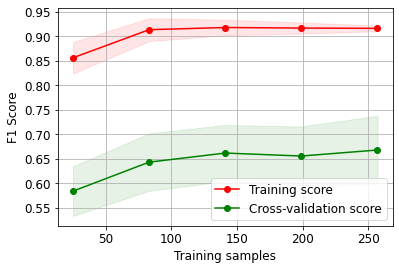

In [7]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(grid_result.best_estimator_, X_trainval, y_trainval,
                                     cv=5, random_state=100, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large", title=None);
plt.xlabel("Training samples")
plt.ylabel("F1 Score")
ax = plt.gca()

In [8]:
line = ax.lines[0]
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.856     , 0.91325301, 0.9177305 , 0.91658291, 0.91595331]))

In [9]:
line = ax.lines[1]
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.58394231, 0.64307692, 0.66158654, 0.65552885, 0.66778846]))

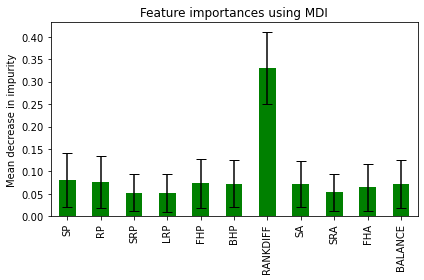

In [23]:
feature_names = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANK', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
importances = grid_result.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_result.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color='g',yerr=std, capsize=5)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('feature_importance', dpi=300)